# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df= pd.merge(mouse_metadata,study_results, how= "left", on= ["Mouse ID" , "Mouse ID"])
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
Total_Mouse = df["Mouse ID"].nunique()

Total_Mouse

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

## we look with .loc specifying ,[rows,columns], rows with the search of .dupolicated using columns "Mouse ID" and "timepoint" in it
## then after the coma, we call too keep by column Mouse ID and to end adding .unique() to recover uniques values into our conditions

Duplicates = df.loc[df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
Duplicates


## shows that "g989" its the "Mouse ID" is the duplicate only one


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

## then using .loc , in row we add the condition to search into "Mouse ID" only equal to the duplicated one,
## :, and show  all the Columns


dupID = df.loc[df["Mouse ID"] == "g989",:]
dupID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
DF = df[df["Mouse ID"].isin(Duplicates)==False]

In [8]:
# Checking the number of mice in the clean DataFrame.
DF["Mouse ID"].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Tumor_Stats_mean = DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Tumor_Stats_mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
Tumor_Stats_median = DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Tumor_Stats_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
Tumor_Stats_var = DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Tumor_Stats_var

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
Tumor_Stats_std = DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_Stats_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
Tumor_Stats_sem = DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
Tumor_Stats_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
Summ_Stats = pd.DataFrame({"Mean Tumor Volume" : Tumor_Stats_mean,
                           "Median Tumor Volume" : Tumor_Stats_median,
                           "Tumor Volume Variance" : Tumor_Stats_var,
                           "Tumor Volume Std. Dev." : Tumor_Stats_std,
                           "Tumor Volume Std. Err." :  Tumor_Stats_sem
                          })
Summ_Stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,52.431737,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

Tumor_Stats= DF.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std",st.sem])
Tumor_Stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

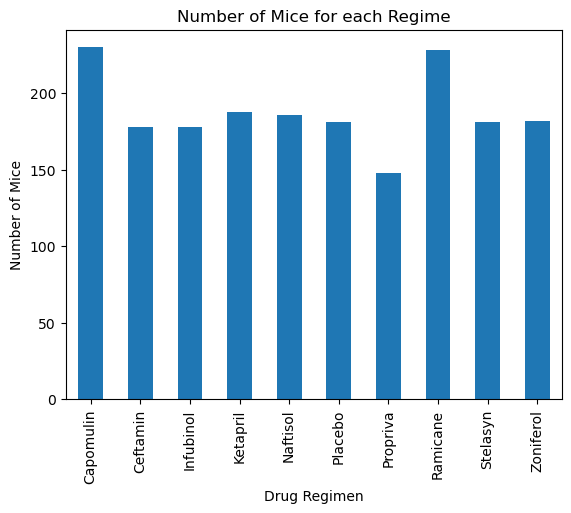

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
g = DF.groupby("Drug Regimen")["Mouse ID"].count()
mouseplot = g.plot.bar()

plt.title("Number of Mice for each Regime")
plt.ylabel("Number of Mice")

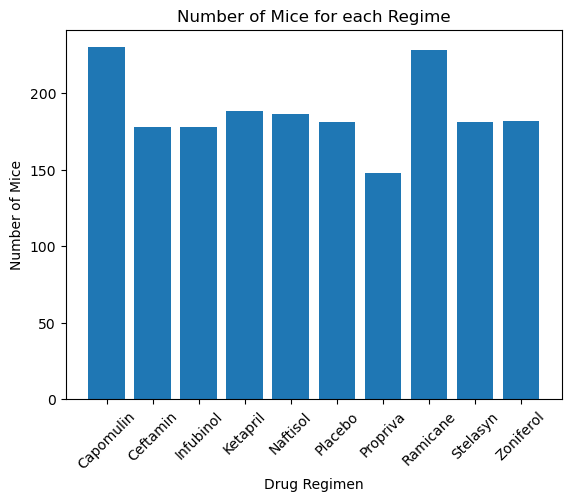

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(g.index, g.values)

plt.title("Number of Mice for each Regime")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=45 )
plt.show()

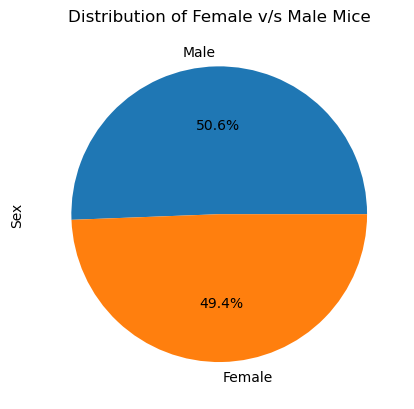

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count=df["Sex"].value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Female v/s Male Mice")
plt.show()

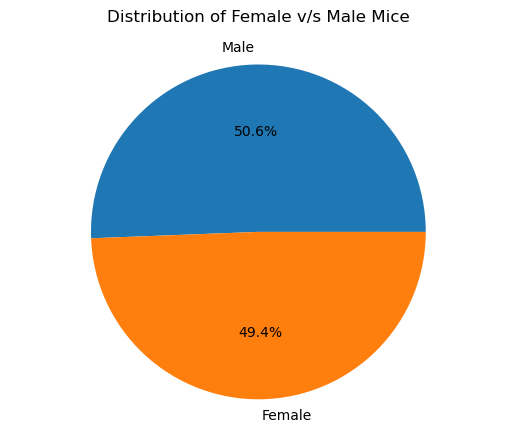

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count.values, labels=gender_count.index,autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Female v/s Male Mice\n")
plt.show()


## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin= DF.loc[DF["Drug Regimen"] == "Capomulin",:]
Ramicane= DF.loc[DF["Drug Regimen"] == "Ramicane",:]
Infubinol = DF.loc[DF["Drug Regimen"] == "Infubinol",:]
Ceftamin = DF.loc[DF["Drug Regimen"] == "Ceftamin",:]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


# Start by getting the last (greatest) timepoint for each mouse

## Capomulin

In [78]:
#Max Timepoints and Merging with DF
Capomulin_max = pd.DataFrame(Capomulin.groupby('Mouse ID')['Timepoint'].max())

Capomulin_merge = pd.merge(Capomulin_max, DF, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [ ]:
#now we call "Tumor Volume (mm3)" from the last dataframe and asign it to a new Variable to then calculate Stats
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


## Ramicane

In [ ]:
Capomulin_max = pd.DataFrame(Capomulin.groupby('Mouse ID')['Timepoint'].max())

Capomulin_merge = pd.merge(Capomulin_max, DF, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()



In [ ]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


## Infubinol

In [ ]:
Capomulin_max = pd.DataFrame(Capomulin.groupby('Mouse ID')['Timepoint'].max())

Capomulin_merge = pd.merge(Capomulin_max, DF, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


In [ ]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


## Ceftamin

In [ ]:
Capomulin_max = pd.DataFrame(Capomulin.groupby('Mouse ID')['Timepoint'].max())

Capomulin_merge = pd.merge(Capomulin_max, DF, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


In [ ]:
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
